In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [2]:
#En este caso sólo usaremos columnas de tipo flotante
archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
d = [df.dtypes=='float64']
l = [d[0][i] for i in range(len(df.columns))]
df_float = df.loc[:,l]

In [3]:
df_float.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km
0,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,13495.0,11.190476
1,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476
2,94.5,0.822681,0.909722,52.4,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421
3,99.8,0.848630,0.919444,54.3,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667
4,99.4,0.848630,0.922222,54.3,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556


In [4]:
#generamos nuevas columnas con ruido aleatorio
rng = np.random.RandomState(42)
ruido = rng.normal(size=(df.shape[0], 10))
df_ruido =pd.DataFrame(ruido)

In [5]:
df2 = pd.concat([df_float,df_ruido],axis=1)

In [6]:
df2.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price,...,0,1,2,3,4,5,6,7,8,9
0,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,13495.0,...,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,16500.0,...,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,94.5,0.822681,0.909722,52.4,2.68,3.47,9.0,154.0,5000.0,16500.0,...,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,99.8,0.848630,0.919444,54.3,3.19,3.40,10.0,102.0,5500.0,13950.0,...,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,99.4,0.848630,0.922222,54.3,3.19,3.40,8.0,115.0,5500.0,17450.0,...,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040


In [7]:
df2.corr()['price'].sort_values()

8                   -0.197906
6                   -0.115117
peak-rpm            -0.103535
3                   -0.082642
9                   -0.075617
0                   -0.049302
2                   -0.024422
4                   -0.002869
7                    0.001924
5                    0.034916
1                    0.066222
compression-ratio    0.067759
stroke               0.107893
height               0.182407
bore                 0.544375
wheel-base           0.591956
length               0.689466
width                0.744176
horsepower           0.802040
city-L/100km         0.803669
price                1.000000
Name: price, dtype: float64

In [8]:
y = df2['price'] #variable dependiente (a predecir)
X = df2.drop(['price'],axis=1) #variables independientes (features)

In [11]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [12]:
X.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,0,1,2,3,4,5,6,7,8,9
0,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,11.190476,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,11.190476,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,94.5,0.822681,0.909722,52.4,2.68,3.47,9.0,154.0,5000.0,12.368421,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,99.8,0.848630,0.919444,54.3,3.19,3.40,10.0,102.0,5500.0,9.791667,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,99.4,0.848630,0.922222,54.3,3.19,3.40,8.0,115.0,5500.0,13.055556,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040


In [13]:
#y = m*x + b

from sklearn.feature_selection import f_regression #f_classif para problemas de clasificación
from sklearn.feature_selection import SelectPercentile
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html

In [14]:
select = SelectPercentile(score_func=f_regression, percentile=50)

In [17]:
select.fit(X, y)

/home/heidi/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


SelectPercentile(percentile=50,
                 score_func=<function f_regression at 0x7f9636f41700>)

In [18]:
X_sel = select.transform(X)
print("X_initial",X.shape)
print("X_sel",X_sel.shape)

X_initial (196, 20)
X_sel (196, 10)


/home/heidi/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[('wheel-base', True), ('length', True), ('width', True), ('height', True), ('bore', True), ('stroke', True), ('compression-ratio', False), ('horsepower', True), ('peak-rpm', False), ('city-L/100km', True), (0, False), (1, False), (2, False), (3, False), (4, False), (5, False), (6, True), (7, False), (8, True), (9, False)]


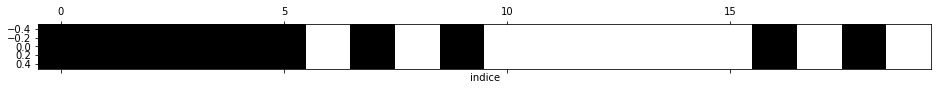

In [23]:
mask = select.get_support()
print([a for a in zip(X.columns,mask)])
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("indice")
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [26]:
X_train.columns[select.get_support()]

Index([  'wheel-base',       'length',        'width',       'height',
               'bore',       'stroke',   'horsepower', 'city-L/100km',
                    6,              8],
      dtype='object')

In [27]:
select = SelectPercentile(score_func=f_regression,percentile=50)
select.fit(X_train, y_train)
X_sel = select.transform(X_train)

/home/heidi/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/heidi/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [28]:
X_test_sel = select.transform(X_test)
lr = LinearRegression()
lr_red = LinearRegression()
lr.fit(X_train, y_train)
lr_red.fit(X_sel, y_train)

/home/heidi/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/heidi/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [29]:
print("Precisión con todas las columnas: %.2f" %lr.score(X_test, y_test))
print("Precisión con las seleccionadas: %.2f" %lr_red.score(X_test_sel, y_test))

Precisión con todas las columnas: 0.81
Precisión con las seleccionadas: 0.83


/home/heidi/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [2]:
np.random.seed(seed=4)
np.random.rand()

0.9670298390136767